<h1>Writing a function to help you</h1>
<p>Suppose you needed to repeat the same process done in the previous exercise to many, many rows of data. Rewriting your code again and again could become very tedious, repetitive, and unmaintainable.

In this exercise, you will create a function to house the code you wrote earlier to make things easier and much more concise. Why? This way, you only need to call the function and supply the appropriate lists to create your dictionaries! Again, the lists feature_names and row_vals are preloaded and these contain the header names of the dataset and actual values of a row from the dataset, respectively.</p>

In [5]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
'''rs_fxn = lists2dict(feature_names,row_vals)'''
# Print rs_fxn
'''print(rs_fxn)'''

'print(rs_fxn)'

<h1>Processing data in chunks (1)</h1>
<p>Sometimes, data sources can be so large in size that storing the entire dataset in memory becomes too resource-intensive. In this exercise, you will process the first 1000 rows of a file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset.

The csv file 'world_dev_ind.csv' is in your current directory for your use. To begin, you need to open a connection to this file using what is known as a context manager. For example, the command with open('datacamp.csv') as datacamp binds the csv file 'datacamp.csv' as datacamp in the context manager. Here, the with statement is the context manager, and its purpose is to ensure that resources are efficiently allocated when opening a connection to a file.

If you'd like to learn more about context managers, refer to the DataCamp course on Importing Data in Python.</p>

In [8]:
# Open a connection to the file
with open('/home/aman-py/Desktop/Datacamp/Data Science TB/Part 2/world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)


{'Kyrgyz Republic': 4, 'Myanmar': 4, 'Timor-Leste': 4, 'East Asia & Pacific (developing only)': 5, 'Suriname': 4, '"Gambia': 4, 'Mexico': 4, 'Liberia': 4, 'Afghanistan': 4, 'Europe & Central Asia (all income levels)': 5, 'French Polynesia': 4, 'Albania': 4, 'South Asia': 5, 'Algeria': 4, 'Slovak Republic': 4, 'Puerto Rico': 4, 'Lebanon': 4, 'Oman': 4, 'Cuba': 4, 'Tuvalu': 4, 'United Kingdom': 4, 'Malaysia': 4, 'Belgium': 4, 'Least developed countries: UN classification': 5, 'Denmark': 4, 'Fiji': 4, 'Russian Federation': 4, 'Upper middle income': 5, 'Pakistan': 4, 'Ecuador': 4, 'Aruba': 4, 'Ghana': 4, 'Brunei Darussalam': 4, 'Other small states': 5, 'Uzbekistan': 4, 'Lower middle income': 5, 'Andorra': 4, 'Mongolia': 4, 'Turkmenistan': 4, 'Ireland': 4, 'Sri Lanka': 4, 'St. Lucia': 4, 'East Asia & Pacific (all income levels)': 5, 'St. Vincent and the Grenadines': 4, 'South Africa': 4, 'American Samoa': 4, 'European Union': 5, 'Azerbaijan': 4, 'Equatorial Guinea': 4, 'Trinidad and Tobago'

<h1>Writing a generator to load data in chunks (2)</h1>
<p>In the previous exercise, you processed a file line by line for a given number of lines. What if, however, you want to do this for the entire file?

In this case, it would be useful to use generators. Generators allow users to lazily evaluate data. This concept of lazy evaluation is useful when you have to deal with very large datasets because it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once.

In this exercise, you will define a generator function read_large_file() that produces a generator object which yields a single line from a file each time next() is called on it. The csv file 'world_dev_ind.csv' is in your current directory for your use.

Note that when you open a connection to a file, the resulting file object is already a generator! So out in the wild, you won't have to explicitly create generator objects in cases such as this. However, for pedagogical reasons, we are having you practice how to do this here with the read_large_file() function. Go for it!</p>

In [10]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data

# Open a connection to the file
with open('/home/aman-py/Desktop/Datacamp/Data Science TB/Part 2/world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))


CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



<h1>Writing a generator to load data in chunks (3)</h1>
<p>Great! You've just created a generator function that you can use to help you process large files.

Now let's use your generator function to process the World Bank dataset like you did previously. You will process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset. For this exercise, however, you won't process just 1000 rows of data, you'll process the entire dataset!

The generator function read_large_file() and the csv file 'world_dev_ind.csv' are preloaded and ready for your use. Go for it!</p>

In [11]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('/home/aman-py/Desktop/Datacamp/Data Science TB/Part 2/world_ind_pop_data.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)


{'Kyrgyz Republic': 55, 'Myanmar': 55, 'Timor-Leste': 55, 'East Asia & Pacific (developing only)': 55, 'Suriname': 55, '"Gambia': 55, 'Serbia': 25, 'Mexico': 55, 'Liberia': 55, 'Afghanistan': 55, 'Europe & Central Asia (all income levels)': 55, 'French Polynesia': 55, 'Albania': 55, 'South Asia': 55, 'Algeria': 55, 'Slovak Republic': 55, 'Puerto Rico': 55, 'Lebanon': 55, 'Oman': 55, 'Cuba': 55, 'Tuvalu': 55, 'United Kingdom': 55, 'Malaysia': 55, 'Belgium': 55, 'Least developed countries: UN classification': 55, 'Denmark': 55, 'Fiji': 55, 'Russian Federation': 55, 'Upper middle income': 55, 'Pakistan': 55, 'Ecuador': 55, 'Aruba': 55, 'Ghana': 55, 'Brunei Darussalam': 55, 'Other small states': 55, 'Uzbekistan': 55, 'Lower middle income': 55, 'Andorra': 55, 'Mongolia': 55, 'Turkmenistan': 55, 'Ireland': 55, 'Sri Lanka': 55, 'St. Lucia': 55, 'East Asia & Pacific (all income levels)': 55, 'St. Vincent and the Grenadines': 55, 'South Africa': 55, 'American Samoa': 55, 'European Union': 55, '

<h1>Writing an iterator to load data in chunks (1)</h1>
<p>Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do pd.read_csv(filename, chunksize=100). This creates an iterable reader object, which means that you can use next() on it.

In this exercise, you will read a file in small DataFrame chunks with read_csv(). You're going to use the World Bank Indicators data 'ind_pop.csv', available in your current directory, to look at the urban population indicator for numerous countries and years.</p>

In [13]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('/home/aman-py/Desktop/Datacamp/Data Science TB/Part 2/world_ind_pop_data.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))


                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

<h1>Writing an iterator to load data in chunks (2)</h1>
<p>In the previous exercise, you used read_csv() to read in DataFrame chunks from a large dataset. In this exercise, you will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk.

To process the data, you will create another DataFrame composed of only the rows from a specific country. You will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. Finally, you will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

You're going to use the data from 'ind_pop_data.csv', available in your current directory. Pandas has been imported as pd</p>

In [22]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv' , chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


<h1>Writing an iterator to load data in chunks (3)</h1>
<p>You're getting used to reading and processing data in chunks by now. Let's push your skills a little further by adding a column to a DataFrame.

In this exercise, you will be using a list comprehension to create the values for a new column 'Total Urban Population' from the list of tuples that you generated earlier. Recall from the previous exercise that the first and second elements of each tuple consist of, respectively, values from the columns 'Total Population' and 'Urban population (% of total)'. The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each tuple. Furthermore, because the 2nd element is a percentage, you need to divide the entire result by 100, or alternatively, multiply it by 0.01.</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


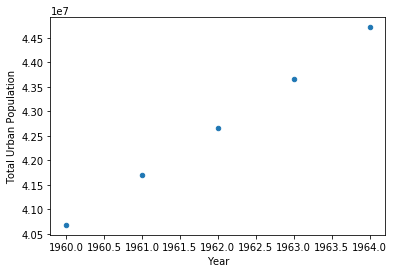

In [18]:
import matplotlib.pyplot as plt
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('/home/aman-py/Desktop/Datacamp/Data Science TB/Part 2/world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], 
            df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0]*tup[1]*.01) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

<h1>Writing an iterator to load data in chunks (4)</h1>
<p>In the previous exercises, you've only processed the data from the first DataFrame chunk. This time, you will aggregate the results over all the DataFrame chunks in the dataset. This basically means you will be processing the entire dataset now. This is neat because you're going to be able to process the entire large dataset by just working on smaller pieces of it!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot have been imported as pd and plt respectively for your use.</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


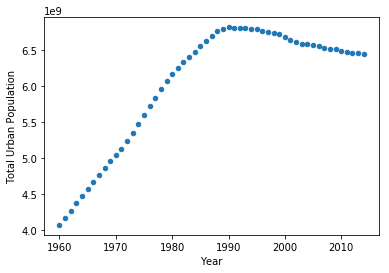

In [20]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('/home/aman-py/Desktop/Datacamp/Data Science TB/Part 2/world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

<h1>Writing an iterator to load data in chunks (5)</h1>
<p>This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise, you will put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, and the country code of the rows you want to process in the dataset.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:

    Loading of the file chunk by chunk,
    Creating the new column of urban population values, and
    Plotting the urban population data.
</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


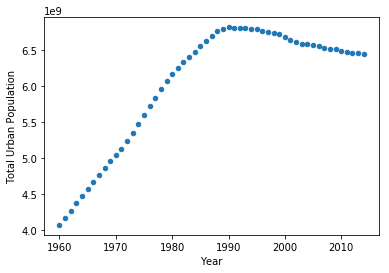

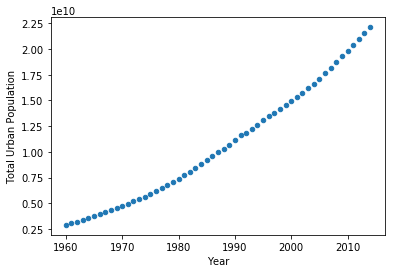

In [21]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')
